#**Topics extraction from 20 NEWS GROUPS Data**

In [0]:
from sklearn.datasets import fetch_20newsgroups 

In [3]:
groups = fetch_20newsgroups()

##**Thinking about feature**

In [4]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [0]:
import numpy as np

In [9]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**The range from 0-19 represents the 20 topics**

In [10]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [11]:
groups.target[0]

7

In [12]:
groups.target_names[groups.target[0]]

'rec.autos'

In [13]:
len(groups.data[0])

721

In [14]:
len(groups.data[1])

858

## **Visualization**

In [15]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


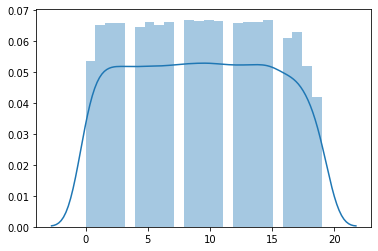

In [16]:
sns.distplot(groups.target)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.datasets import fetch_20newsgroups 

In [24]:
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

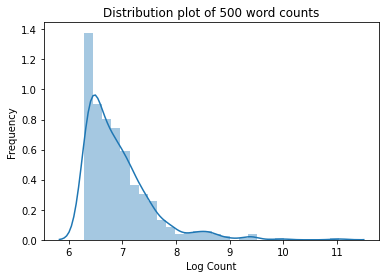

In [25]:
sns.distplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution plot of 500 word counts')
plt.show()

## **Data Preprocessing**

In [0]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [0]:
def letters_only(astr) :
  return astr.isalpha()

In [0]:
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()


In [31]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [45]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

### **Clustering**

In [47]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('names')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [0]:
def letters_only(astr) :
  return astr.isalpha()
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()


In [49]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [50]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
number_of_clusters = 20
transformed = cv.fit_transform(cleaned)
kmmodel = KMeans(n_clusters=number_of_clusters)
kmmodel.fit(transformed)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
order_centroids = kmmodel.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

In [90]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        plt.show()

Cluster 0:
 know
 think
 use
 new
 make
 good
 need
 thing
 way
 problem
Cluster 1:
 ha
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 2:
 article
 young
 force
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 3:
 university
 young
 good
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 4:
 kind
 young
 food
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 5:
 read
 young
 going
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 6:
 time
 young
 got
 free
 friend
 ftp
 function
 game
 general
 getting
Cluster 7:
 right
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 8:
 want
 young
 food
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 9:
 window
 young
 good
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 10:
 say
 going
 force
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 11:
 mean
 young
 food
 form
 free
 friend
 ftp
 function
 game
 general
Cluster 12:
 help
 young


### **Topic modelling using non-negative matrix factorization(NMF)**

In [91]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('names')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [0]:
def letters_only(astr) :
  return astr.isalpha()
cv = CountVectorizer(stop_words='english',max_features=500)
groups = fetch_20newsgroups()

In [93]:
import nltk
nltk.download('names')
cleaned=[]
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [94]:
import nltk
nltk.download('wordnet')
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
pip install scikit-learn

In [0]:
transformed = cv.fit_transform(cleaned)

In [0]:
d=5  # num topics
clf = NMF(n_components=d, random_state=1).fit(transformed)

In [122]:
for topic_idex, topic in enumerate(clf.components_):
  label = '{}: '.format(topic_idex)
  print(label, " ".join([cv.get_feature_names()[i]
                         for i in topic.argsort()[::]]))

0:  able pretty press president power posting posted post possible position political policy police previous point play place phone personal person period people pc pay past particular package player output price probably result rest response research report reply remember religious religion reference recently reason private really reading read rate radio quite question purpose public provide project program product real return original opinion member medical mean maybe matter manager man making major main mail machine memory low lot lost looking look york long local live little list line likely love order men method open old office offer number note north nice news network needed near message national na muslim mouse moral month monitor money model mode mind million military nasa road rule run unit understand type turn turkish trying try truth true tried total took united told tin time thought thinking thanks text texas test term tell technology technical today team unix usa wrong wri